In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

%matplotlib inline

In [21]:
df = pd.read_excel('Data2012-2015.xlsx')

In [54]:
#Add column of activation date and count date to see if difference
df['Diff'] = df['Count Date'] - df['Activation Date']
df['Diff_Month'] = df['Diff'].astype('timedelta64[M]')

In [55]:
df.head()

,id,PX,Main,Midblock Route,Side 1 Route,Side 2 Route,Activation Date,latitude,longitude,Count Date,8HrVehVol,8HrPedVol,n_id,Diff,Diff_Month
0,1,4,JARVIS ST,NaN,ADELAIDE ST E,NaN,1958-09-12,43.651534,-79.372360,2012-08-15,19037,5679,73.0,19696 days,647.0
1,2,14,BLOOR ST E,NaN,TED ROGERS WAY,NaN,1951-03-28,43.671577,-79.380520,2012-05-31,16991,7835,74.0,22345 days,734.0
2,3,22,CHURCH ST,NaN,GERRARD ST E,NaN,1941-07-18,43.659858,-79.378522,2012-09-05,17164,14490,75.0,25982 days,853.0
3,4,25,BLOOR ST E,NaN,CHURCH ST,NaN,1932-02-19,43.671022,-79.383123,2012-05-30,18894,26556,75.0,29321 days,963.0
4,5,27,VICTORIA ST,NaN,RICHMOND ST E,NaN,1927-11-03,43.651952,-79.377756,2012-07-10,12770,6969,75.0,30931 days,1016.0


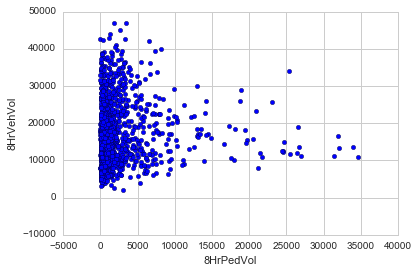

In [59]:
#Scatter plot on Veh and Ped with date
plt.scatter(df['8HrPedVol'],df['8HrVehVol'])

plt.ylabel('8HrVehVol')
plt.xlabel('8HrPedVol')

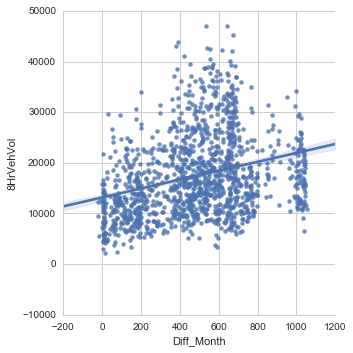

In [56]:
#Linear fit on date diff with 8HrVehVol
sns.lmplot('Diff_Month','8HrVehVol',data=df)

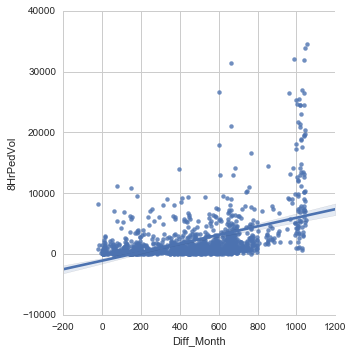

In [60]:
#Linear fit on date diff with 8HrPedVol
sns.lmplot('Diff_Month','8HrPedVol',data=df)

In [ ]:
#Base on visualization above, there is no linear relation between data with date, and data with data
#It do not need to analysis the linear relationship. So I started getting category data below

In [72]:
#If I try to bring the category information into dataset, like library, exhibition
#There are no geo code matching the dataset
df_geo = pd.read_excel('Data2012-2015.xlsx',sheetname=1)
df_geo.head()
combine = pd.merge(df,df_geo,how='left',on=['latitude','longitude'])
combine.n_id_y.count()

0